# Cover Set Algorithm 1

## Pre_process.py 
- csv 데이터 전처리
  - 컬럼 이름 변경
- csv 데이터 시각화

,X,Y
0,-6.810625,-0.060347
1,-0.303414,-2.979659
2,-7.891267,-11.736160
3,4.327531,2.606615
4,-9.171777,-6.358040
...,...,...
495,6.167753,11.217280
496,3.306280,-7.856879
497,-4.374134,-7.369407
498,-8.664096,-5.931189


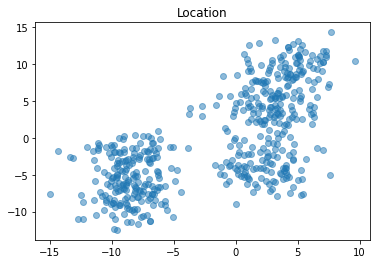

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def parse_csv(path : str):
    scp_df = pd.read_csv(path)
    scp_df = scp_df.rename(columns={'X0':'X'})
    scp_df = scp_df.rename(columns={'X1':'Y'})

    plt.scatter(scp_df['X'],scp_df['Y'], alpha=0.5)
    plt.title('Location')

    return scp_df

parse_csv("scp_data.csv")

## Euclid_dist.py
- 유클리드 거리 계산 모듈
  - 원의 중심점 (Cx,Cy)로 부터 대상 점(Px,Py)까지의 거리가 radius보다 작을때 원 안에 포함되므로 True를 반환한다


In [9]:
import math

def isInCircle(Cx, Cy, Px, Py, radius : int):
    dist = math.sqrt((ax-bx)**2 + (ay-by)**2)
    if dist <= radius:
        return True
    else:
        return False


## Gen_circle.py

In [24]:
class Gen_circle:
    csv_df : pd.DataFrame()
    def __init__(self, path):
        self.csv_df = parse_csv(path)

    def point_to_center(self):
        print(self.csv_df)


            X          Y
0   -6.810625  -0.060347
1   -0.303414  -2.979659
2   -7.891267 -11.736160
3    4.327531   2.606615
4   -9.171777  -6.358040
..        ...        ...
495  6.167753  11.217280
496  3.306280  -7.856879
497 -4.374134  -7.369407
498 -8.664096  -5.931189
499  2.560500  -1.912164

[500 rows x 2 columns]


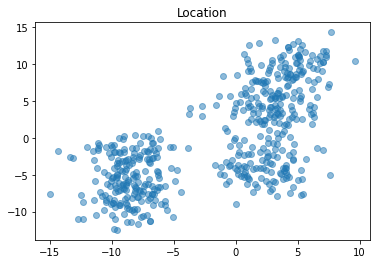

In [25]:
c = Gen_circle("scp_data.csv")

c.point_to_center()